# Занятие 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## Оценка распределений

### Дискретное

In [2]:
N = 10000
sample = np.random.choice([1,2,3,4,5,6], N)
sample

array([4, 1, 1, ..., 5, 4, 2])

In [3]:
# оценим функцию вероятности частотами
unique_value, counts = np.unique(sample, return_counts=True)

print(counts)
print(counts / N)
print(unique_value)
print (np.sum(counts / N))

[1714 1673 1716 1665 1609 1623]
[0.1714 0.1673 0.1716 0.1665 0.1609 0.1623]
[1 2 3 4 5 6]
0.9999999999999999


In [4]:
for N in [10, 100, 1000, 10000, 100000]:
    sample = np.random.choice([1,2,3,4,5,6], N)
    unique_value, counts = np.unique(sample, return_counts=True)
    print(unique_value)
    print("{}: {} {}".format(N, counts/N, np.sum(counts/N)))

[1 2 3 4 5 6]
10: [0.1 0.1 0.1 0.4 0.2 0.1] 1.0000000000000002
[1 2 3 4 5 6]
100: [0.19 0.2  0.21 0.18 0.14 0.08] 1.0
[1 2 3 4 5 6]
1000: [0.194 0.149 0.154 0.168 0.168 0.167] 1.0
[1 2 3 4 5 6]
10000: [0.1685 0.1668 0.1631 0.1679 0.1687 0.165 ] 1.0
[1 2 3 4 5 6]
100000: [0.16707 0.1687  0.1683  0.16544 0.16396 0.16653] 1.0


In [5]:
1/6

0.16666666666666666

### Непрерывное

In [6]:
# возьмём выборку из нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
#sample

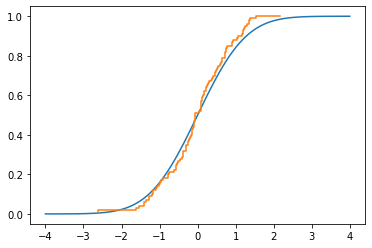

In [7]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='Теоретическая функция распределения')

# Воспользуемся библиотекой для оценки (спасибо питон!)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='Оценка функции распределения')


[ 1.  0.  9. 10. 17. 27. 17. 11.  7.  1.]


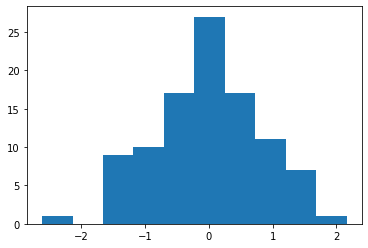

In [8]:
# теперь посмотрим на функцию плотности
b, n, _ = plt.hist(sample)
print(b)

In [9]:
len(n)

11

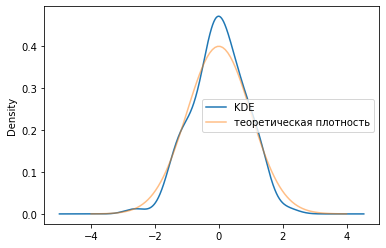

In [10]:
# ядерное сглаживание
# можно сделать в pandas
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# строим теоретическую плотность
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

### Предсказательный интервал
Имеем $X \sim N(\mu, \sigma^2)$. Согласно правилу [2-х сигм](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5#%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D1%82%D1%80%D1%91%D1%85_%D1%81%D0%B8%D0%B3%D0%BC) имеем $$\mathbf{P}(\mu - 2 \sigma \leq X \leq \mu + 2 \sigma) \approx 0.95$$



Если мы применим данное правило к стандартному нормальному распределению $X \sim N(0,1)$, то получим
$$\mathbf{P}(0 - 2 \cdot 1 \leq X \leq 0 + 2 \cdot 1) \approx 0.95$$

Проиллюстрируем это визуально

In [11]:
# возьмём выборку из стандартного нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
sample

array([ 1.71666262, -0.58078551, -0.88420797,  0.32926543, -0.59979614,
        1.60149323, -0.05021761, -0.33977323, -0.68310984,  0.23494006,
       -1.26697374,  1.79502063,  0.42208901, -0.06804012,  0.25333871,
       -0.88764778,  0.92783116, -0.30258982,  0.16065243,  0.58111466,
        0.40159345, -0.58860555, -1.55311803, -0.33843654, -0.70556316,
       -0.60541716, -0.02994132, -0.05145628,  0.02947647, -0.4912074 ,
        0.78969646,  0.25660403,  0.71784736,  1.52553544, -0.17919346,
       -1.35906186, -0.26042749,  0.4677378 ,  0.52936764,  0.36583091,
        1.41597338,  1.90421822, -1.45822333, -0.77342646, -0.68591891,
       -1.22863361, -1.42798248,  0.83513771, -1.27873454, -1.46922135,
        0.48816708, -1.8171741 , -0.65660227,  0.58002243,  1.40824185,
        0.67982669, -0.08522733,  0.46002772,  0.03260375, -0.62019569,
        2.00158459, -0.46413218,  1.0526473 ,  0.59185039,  0.42923712,
        0.28770523,  0.61272305, -0.59039165,  0.39070625, -0.42

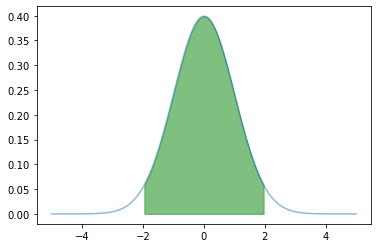

In [12]:
x = np.linspace(-5,5,10000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
to_fill = np.linspace(-1.96, 1.96, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

In [13]:
norm_rv.pdf(-1.96)

0.058440944333451476

Оценка эта неточная, и не всегда нам нужно именно 0.95 вероятностной массы. 

В общем случае работают с квантилями

In [14]:
norm_rv.ppf(0.25)

-0.6744897501960817

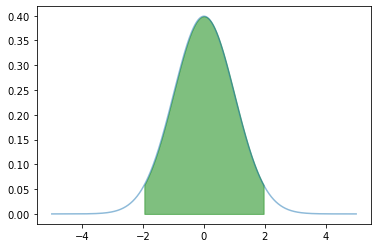

In [15]:
alpha = 0.05
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
q_a = norm_rv.ppf(alpha/2)
q_b = norm_rv.ppf(1-alpha/2)
to_fill = np.linspace(q_a, q_b, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

Теперь, если мы хотим найти такой интервал в котором с вероятностью 95% окажется реализация нашей случайной величины, нам лишь нужно найти соответствующие квантили $X_{\frac{\alpha}{2}}$ и $X_{1-\frac{\alpha}{2}}$.

Такой интервал можем найти для произвольно распределенной случайной величины

В частности, для нормально распределенной случайной величины
$$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \sigma \leq X \leq \mu + \zeta_{1-\frac{\alpha}{2}} \sigma) = 1-\alpha$$

$\zeta_{\alpha}$ будем обозначать квантиль порядка $\alpha$ стандартного нормального распределения (то-есть распределения $N(0,1)$). Тут мы воспользовались тем, что $\zeta_{\frac{\alpha}{2}} = - \zeta_{1-\frac{\alpha}{2}}$

$ \zeta_{0.975} \approx 1.95996 \approx 2$



**Предсказательный интервал оценивает диапазон значений**

### Доверительный интервал
Точечные оценки параметров это уже что-то, но также представляет интерес и то, в каком диапазоне изменяются оцениваемые параметры, например, средние значения.

Отвечают на вопрос **в каком диапазоне скорее всего лежит оцениваемый параметр**



Например, снова возьмем выборку из нормального распределения $X^n = (X_1, \dotso, X_n),\ X \sim \mathbf{N}(\mu, \sigma^2)$

Пусть нам известна дисперсия, т.е $\sigma^2$. Тогда по [свойствам](http://www.machinelearning.ru/wiki/index.php?title=%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) нормального распределения получаем $\sum_{i=1}^{n} X_i \sim \mathbf{N}(n\mu, n\sigma^2) \rightarrow \frac{\sum_{i=1}^{n} X_i}{n} = \overline{X_n} \sim \mathbf{N}(\mu, \frac{\sigma^2}{n})$

По формуле для предсказательного интервала получаем $$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \overline{X_n} \leq \mu + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Теперь, переносим $\overline{X_n}$ и $\mu$ в неравенствах, и получаем доверительный интервал для $\mu$

$$\mathbf{P}(\overline{X_n} - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X_n} + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Интервал для N 10 13.407 ... 21.773
Интервал для N 50 8.426 ... 12.168
Интервал для N 100 7.267 ... 9.912
Интервал для N 100000 5.073 ... 5.157


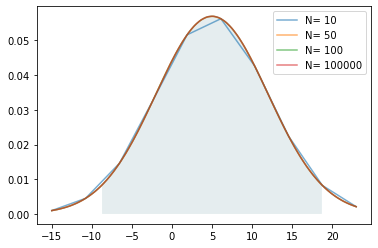

In [16]:
# Задание, 
# 1) сгенерируйте 10, 50, 100 примеров из нормального распределения с произвольными мат ожиданием и дисперсией
# 2) Постройте по формуле интервал с alpha = 0.05
# ваш код тут
mu = 5
sigma = 7
norm_rv = sts.norm(mu, sigma)
alpha = 0.05
N = [10, 50, 100, 100000]
#colors = ['cyan', "purple", "orange", "yellow"]
for n in N:
    sample = np.linspace(-15, 23, n)
    pdf = norm_rv.pdf(sample)
    plt.plot(sample, pdf, alpha = .6)
    q_a_m = norm_rv.ppf(alpha/2)
    q_a_p = norm_rv.ppf(1 - alpha/2)
    to_fill = np.linspace(q_a_m, q_a_p, 100)
    plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha = 1/n)
    plt.legend([" ".join(("N=", str(n))) for n in N])
    print ("Интервал для N %.f %.3f ... %.3f" % (n, sample[np.argmax(pdf)] - q_a_m * np.sqrt(sigma/n) ,
                                                sample[np.argmax(pdf)] + q_a_p * np.sqrt(sigma/n)))

Случай известной дисперсии как правило встречается для измерительных приборов, когда нам известная его погрешность.

Есть метод, позволяющий построить доверительный интервал и для такого случая. Разница будет лишь в том, что вместо выборочной дисперсии будет взята выборочная дисперсия, а вместо квантилей стандартного нормального распределения используют квантили распределения Стьюдента (согласно которой распределена так называемая t-статистика)

Но что делать, если распределение отлично от нормального или это доподлино неизвестно?


К счастью...


## Центральная предельная теорема

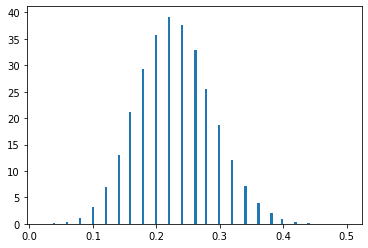

In [17]:
p=.23
ber_rv = sts.bernoulli(p)
ber_rv.rvs(20)
N = 50
NN = 100000
# сгенерируем много выборочных средних
means = []
for i in range(NN):
    means.append(np.mean(ber_rv.rvs(N)))
plt.hist(means, density=True, bins='auto');

In [18]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([2.2054241 , 1.6691493 , 3.4749784 , 2.77872414, 2.43390916,
       2.84039908, 2.62505029, 2.12084977, 2.15453019, 1.62600558])

In [19]:
N = 222
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(uniform_rv.rvs(N)))

(array([0.06530342, 0.06530342, 0.3265171 , 0.71833762, 1.11015814,
        1.82849577, 3.06926075, 3.65699153, 5.55079072, 6.00791466,
        6.00791466, 7.37928649, 6.33443176, 5.94261124, 5.61609414,
        3.65699153, 3.13456417, 1.63258551, 1.37137182, 0.71833762,
        0.58773078, 0.13060684, 0.13060684, 0.06530342, 0.13060684,
        0.06530342]),
 array([2.31972107, 2.3350342 , 2.35034734, 2.36566047, 2.3809736 ,
        2.39628674, 2.41159987, 2.426913  , 2.44222614, 2.45753927,
        2.47285241, 2.48816554, 2.50347867, 2.51879181, 2.53410494,
        2.54941807, 2.56473121, 2.58004434, 2.59535747, 2.61067061,
        2.62598374, 2.64129688, 2.65661001, 2.67192314, 2.68723628,
        2.70254941, 2.71786254]),
 <BarContainer object of 26 artists>)

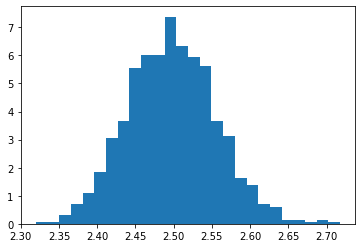

In [20]:
plt.hist(means, density=True, bins='auto')

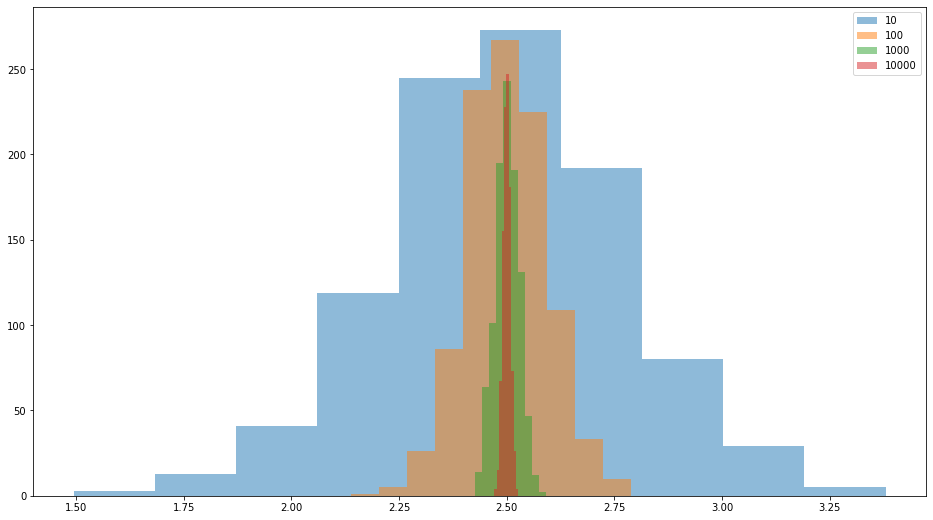

In [21]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(uniform_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [22]:
N = 30
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(uniform_rv.rvs(N)))

means = np.array(means).astype(np.float32)

In [23]:
uniform_rv.mean()

2.5

In [24]:
uniform_rv.var()

0.75

In [25]:
uniform_rv.std()

0.8660254037844386

[]

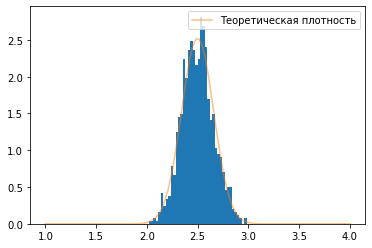

In [34]:
norm_rv = sts.norm(loc=uniform_rv.mean(), scale=uniform_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(1,4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

In [37]:
data = uniform_rv.rvs(N)
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 1.96 * uniform_rv.std() / np.sqrt(N), np.mean(data) + 1.96 * uniform_rv.std() / np.sqrt(N) 
))
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(N)) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [2.0511470529454687, 2.6709534743384706] 
Доверительный интервал для среднего по цпт интервальная оценка: (2.0250221982661434, 2.697078329017796) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (2.30216554911224, 2.4199349781716992) 


#### То же и для дискретных, посмотрим на примере биномиального распределения

In [66]:
binomial_rv = sts.binom(20, 0.4)
binomial_rv.rvs(10)

# мат ожидание np = 20*0.4 = 8
# дисперсия npq = np(1-p) = 20*0.4*0.6 = 8 * 0.6 = 4.8

array([ 8, 12,  8,  8,  6,  7,  8,  6,  8,  9])

Text(0.5, 0, '$x$')

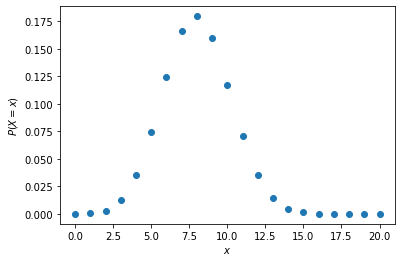

In [67]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

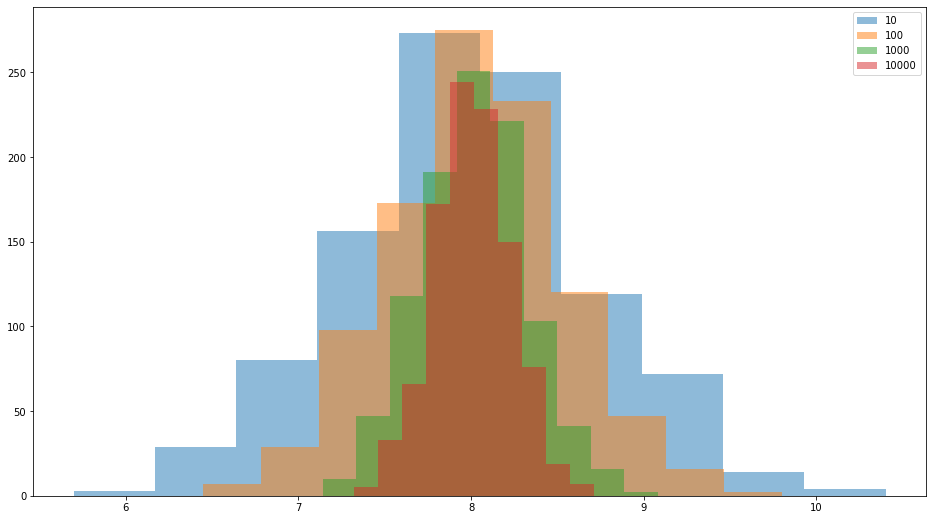

In [68]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
         means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

### Всегда ли ЦПТ хорошо работает?
Вообще в полной формулировке есть формальные требования, определяющие границы применимости данной теоремы. Но пока что, будем говорить, что применять ЦПТ можно, если кол-во примеров по крайней мере пара десятков (30-50), и само распределение случайно величины $X$ не является явно ассимметричным ("скошенным")

#### Попробуем уменьшить вероятность успеха в серии n независимых испытаний, тем самым, сделаем наше распределение успехов несколько более ассиметричным

In [69]:
binomial_rv = sts.binom(20, 0.01)
binomial_rv.rvs(10)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 0, '$x$')

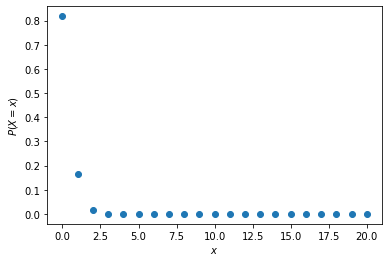

In [70]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

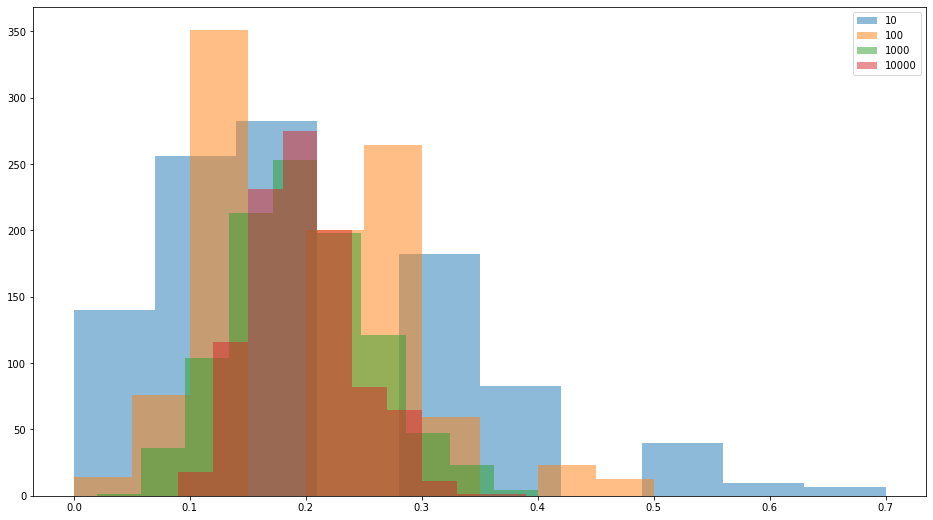

In [71]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
        means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()